# summary

- LDA can

    - visualize hidden thematic structure in large corpora
    
    - generalize new data to fit into that structure

- topic models automatically extract "semantic themes" from large doc collections


- based on latent variable (mixture) models


- "Dice rolling" generative models of words 投骰子


- The topics come from computing the **posterior**

# intro

- topic modeling provide methods for automatically organizing, understanding, searching and summarizing large electronic archives

    - discover hidden themes that pervade the collection
    
    - annotate the docs according to those themes
    
    - use annotations to organize, summarize and search the texts


- usage

    - discover topics from a corpus
    
    - model the evolution of topics over time
    
    - model connections between topics
    
    - find hierarchies of topics
    
    - annotate images

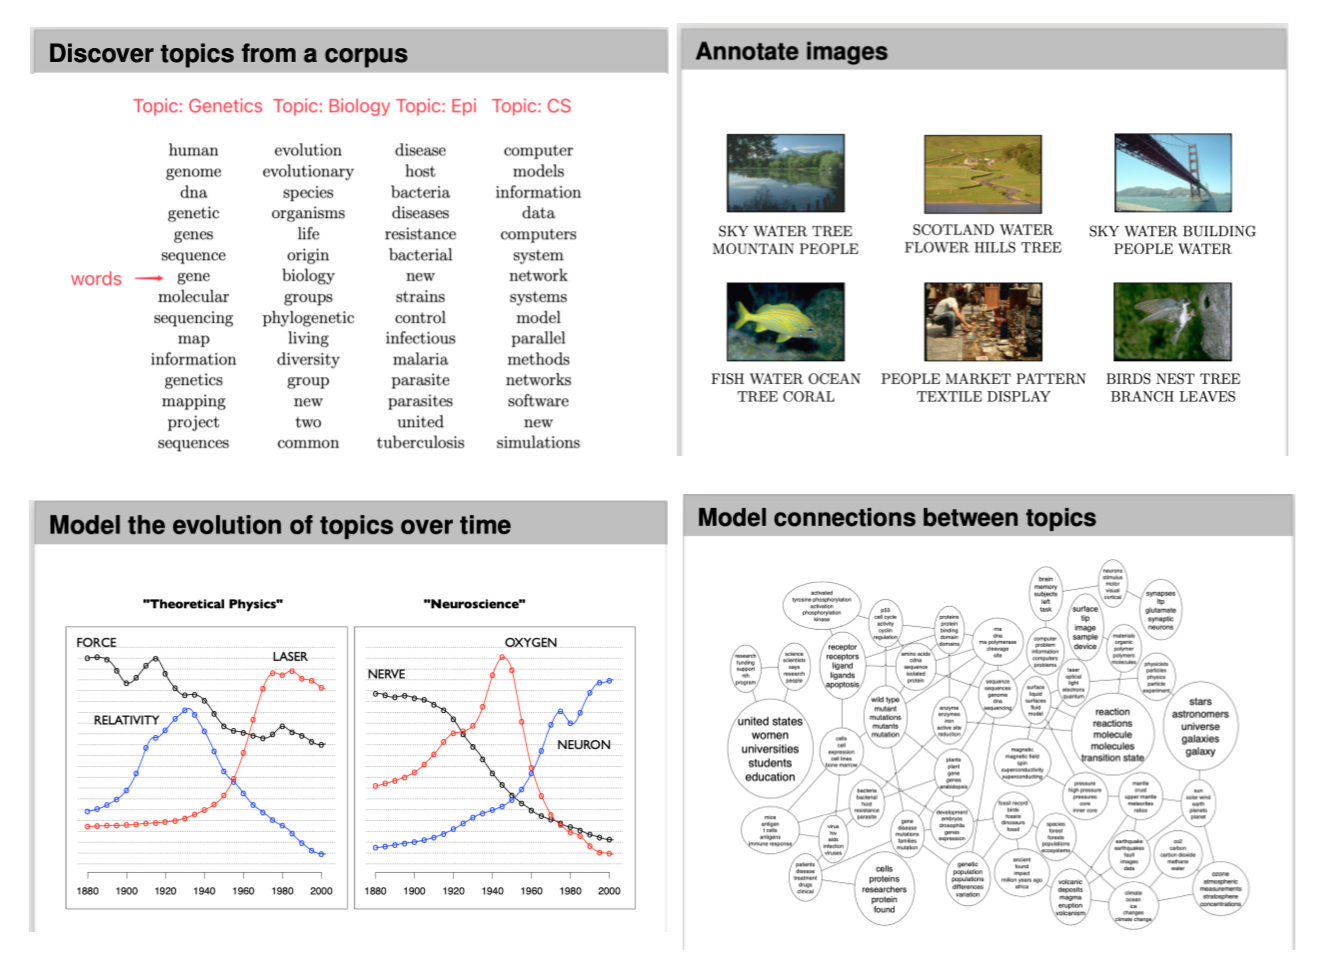

# probabilitic modeling

1.  data are assumed to be observed from a **generative probabilistic** process that includes **hidden variables**

    - in text, data are words, the hidden variables are thematic structure (topics)
    

2. infer the hidden structure using **posterior inference**

    - what are the topics that describe this collection?
    

3. situate new data into the estimated model

    - how does a new doc fit into the topic structure?

# generative model for Latent Dirichlet Allocation (LDA)

- simple intuition: docs exhibit multiple topics

- in reality, we only observe the **docs**, other structure are **hidden variables** (topics, proportions, assignments)


- our goal is to **infer** the hidden variables

    i.e. compute posterior distribution conditioned on docs
    
    $$\mathbb{P}(\text{topics }\beta, \text{proportions } \theta, \text{assignments } z| \text{docs } d)$$

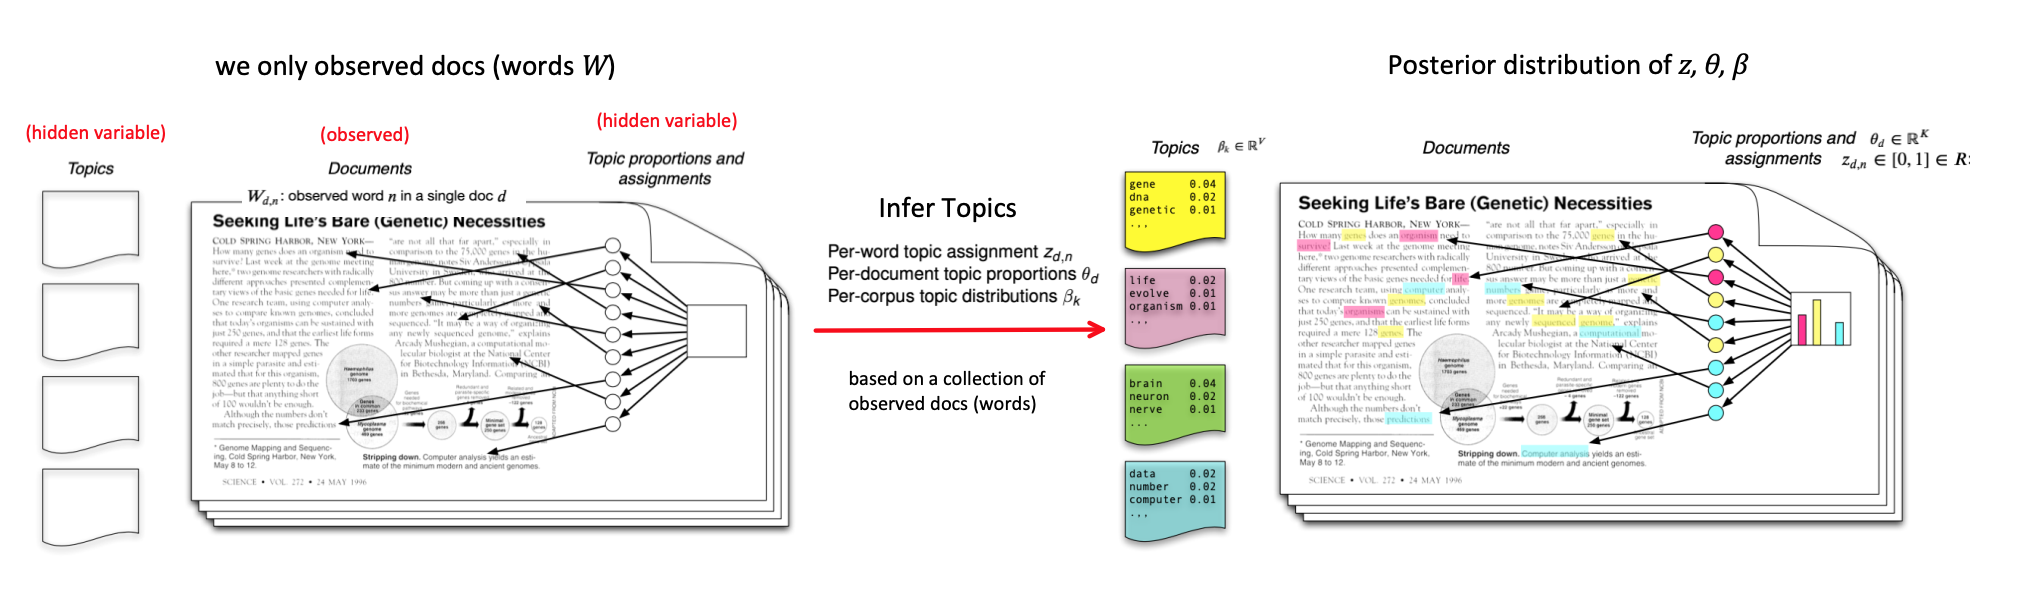

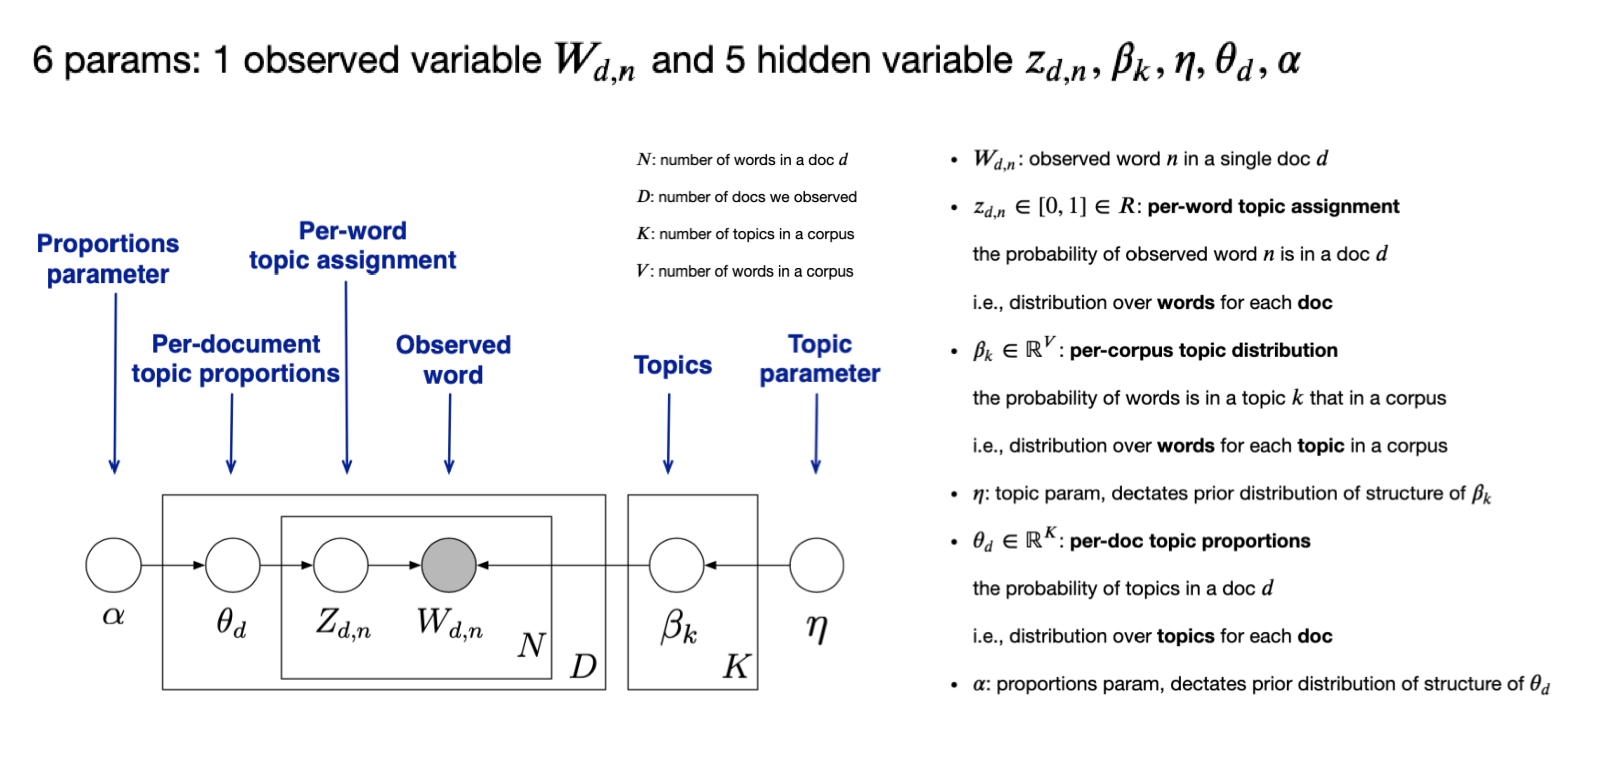

## 3 Hidden structures

- **Topics**: each topic is a distribution over words and each topic belong to a corpus 语料库
    
    per-corpus topic distribution $\beta_k \in \mathbb{R}^V$: the probability of words in a corpus is in a topic $k$
    
    $V$: number of words in a corpus

    e.g., the distribution of words in the Topic "Genetics" is: 
  
$$
\beta_{\text{Genetics}} = \begin{bmatrix}
 0.04\ (\text{gene})\\ 
 0.02\ (\text{DNA})\\ 
0.01\ (\text{Nuclid})\\ 
\cdots\\
0\\
0\\
\end{bmatrix}
$$

the 1st entry of $\beta_{\text{Genetics}}$ means the probability of first word in a corpus - "gene" is in topic "Genetics" is 0.04.

some entries are 0, which means these words are not occured in the topic "Genetics"

$$
[\beta_{\text{Genetics}}]_1 = \mathbb{P}(\text{Word = gene|Topic = Genetics})=0.04
$$
  
  
- **Topic proportions**: each doc is a mixture of corpus-wide topics

    e.g., in the Document "Seeking Life's Bare   Necessities", distribution of topics is 30% Genetics + 20% Biology + 30% Neuro Science + 20% CS. the doc only has 4 topics

    per-doc topic proportions $\theta_d \in \mathbb{R}^K$ is distribution over topics in a document: 

$$
\theta_d = \begin{bmatrix}0.3\ (\text{Genetics})\\ 0.2\ (\text{Biology})\\ 0.3\ (\text{Neuroscience})\\ \cdots \\0\\0\\0.2\ (\text{CS})\end{bmatrix}
$$
    
the 1st entry of the $\theta_d$: probability of topic "Genetics" in a doc $d$ "Seeking Life's Bare   Necessities" is 30%
    
$$[\theta_d]_1 = \mathbb{P}(\text{Topic = Genetics| Doc = "Seeking Life's Bare   Necessities"})=0.3$$
    
Some of the entries are $=0$, these topics are not occured in the doc $d$

$\theta_d$ is sparse, bc a document usually only has a few topics.
    

    
- **Assignments**: each word comes from **one** of those topics

    e.g., word "gene" comes from topic "Genetics", word "data" comes from topic "CS"
    
    per-word topic assiginment $z_{d,n}$: the probability of observed word "gene" $W_{d,n}$ is in a doc $d$ "Seeking Life's Bare   Necessities"
    
$$
\begin{align}
z_{d,n} 
&= \mathbb{P}(\text{Word=gene|Doc = "Seeking Life's Bare  Necessities"})\\[1em]
&= [\beta_{\text{Genetics}}]_1 [\theta_d]_1 \\[1em]
&=\mathbb{P}(\text{Word = gene|Topic = Genetics})\mathbb{P}(\text{Topic = Genetics| Doc = "Seeking Life's Bare   Necessities"}) \\[1em]
&=4\% \times 30\% \\[1em]
&= 1.2\% \\[1em]
\end{align}
$$


## LDA as a graphical model

- encodes our assumptions about the data


- connects to algorithms for computing with data


- see Pattern Recognition and Machine Learning (Bishop, 2006)


- nodes are random variables (圆圈), edges indicate dependence （箭头）


- shaded nodes are observed （黑圆）, other nodes are unknown


- plates indicate replicated variables （矩形）


- This joint defines a posterior, params $\alpha, \eta$


- from a collection of docs, infer

    - per-word topic assignment $z_{d,n}$
    
    - per-doc topic proportions $\theta_d$
    
    - per-corpus topic distribution $\beta_k$
    

- then use posterior expectations to perform the task,

    e.g., info retrieval, doc similarity, exploration

## parameters

6 parameters: 1 observed variable $W_{d,n}$ and 5 hidden variable $z_{d,n}, \beta_k, \eta, \theta_d, \alpha$

- $W_{d,n}$: observed word $n$ in a single doc $d$


- $z_{d,n} \in [0,1]$: **per-word topic assignment**

    the probability of observed word $n$ is in a doc $d$ 
    
    $z_{d} \in \mathbb{R}^N$ is distribution over **words** in a **doc**


- $\beta_k \in \mathbb{R}^V$: **per-corpus topic distribution**

    the probability of all the words in a corpus occur in a topic $k$
    
    i.e., distribution over **words** in a **topic**


- $\eta$: topic parameter, dectates prior distribution of $\beta_k$
    
    
- $\theta_d \in \mathbb{R}^K$: **per-doc topic proportions**    
    
    the probability of topics in a doc $d$ 
    
    i.e., distribution over **topics** in a **doc**
    

- $\alpha$: proportions parameter, dectates prior distribution of $\theta_d$

- $N$: number of words in a doc $d$

- $D$: number of observed docs

- $K$: number of topics

- $V$: number of words in a corpus/vocabulary

## formula

$$
\mathbb{P}(W_{d,n})=\prod _{i=1}^K \mathbb{P}(\beta_i|\eta) \prod _{d=1}^D \mathbb{P}(\theta_d|\alpha) \left [ \prod _{n=1}^N \mathbb{P}(z_{d,n}|\theta_d) \mathbb{P}(W_{d,n}|\beta_{1:K}, z_{d,n}) \right ]
$$

suppose there are $K=100$ topics and $V=10,000,000$ words in a corpus, 

we have $D=20$ docs, one of the doc $d$ has $N=10,000$ words


the probability of word "gene" $n$ occur in this doc $d$ is $\mathbb{P}(W_{d,n})$

$
\mathbb{P}(W_{d,n})
= \left [ \begin{bmatrix}0.04\\ 0.02\\ 0\\0.03 \\ 0.08 \\0.02 \\0.05\\\cdots \end{bmatrix} \cdots K=100\cdots \begin{bmatrix}  0.02\\ 0.01\\ 0.06\\0\\0.07 \\0.03 \\0.04\\ \cdots \end{bmatrix} \right ] \left [ \begin{bmatrix}0.3\\ 0.2\\ 0\\ 0.2\\\cdots \end{bmatrix} \cdots D=20\cdots \begin{bmatrix}0.2\\ 0\\ 0.1\\ 0.6\\\cdots \end{bmatrix} \right ] \left [ \left ( 0.3 \times 0.04 \right )  \cdots N =10,000\cdots \left ( 0.3 \times 0.01 \right )\right ]
$

## Dirichlet distribution

an exponential family distribution over the simplex ($\theta$), i.e., positive vectors that sum to one

$$
\mathbb{P}(\theta|\vec{\alpha})=\frac{\Gamma \left ( \sum _i \alpha_i \right ))}{\prod _i \Gamma (\alpha_i)} \prod_i \theta_i^{\alpha_i -1}
$$

- it's conjugate to the multinomial $\prod_i \theta_i^{\alpha_i -1}$

    Given a multinomial observ, the posterior distribution of $\theta$ is a Dirichlet
    

- the param $\alpha$ controls the mean shape and sparsity of $\theta$



- the topic proportions are a $K$ dimensional Dirichlet: $\theta_d \in \mathbb{R}^K$

    the topics are a $V$ dimensional Dirichlet: $\beta_k \in \mathbb{R}^V$
    
    $V$ is the number of words in a corpus/vocabulary

## why does LDA work?

why could LDA posterior put "topical" words together?

- word probabilities are maximized by dividing the words among the topics

    more terms means more mass to be spread around
    
    
- in a mixture, this is enough to find clusters of **co-occurring** words


- in LDA, Dirichlet on the topic proportions $\theta_d \in \mathbb{R}^K$ can encourage sparsity

    e.g., a doc is penalized for using many topics
    
    one extreme: a doc only has a topic
    
    another extreme: a doc is a uniformly flat mixture of all topics
    
    in reality: a doc has mixed topics
    
    
- loosely, this can be thought of as softening the strict def of "co-occurrence" in a mixture model


- this flexibility leads to sets of terms that more tightly co-occur

# LDA implementation by gensim package

In [2]:
# !pip install gensim
# !pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 1.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20441 sha256=7fb0c6d7c16481fe6b2b6354665e2db8728c41eee13e00924624a096665ebcb5
  Stored in directory: /Users/wenxinxu/Library/Caches/pip/wheels/b4/d2/63/953ff58cf13a31f09d49568238da542cfaedbc8d9cd0adbf80
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3529 sha256=d02c6401c7f7faafd9171d555b5eea7579814b9c952418264aac96d03eced430
  Stored in directory: /Users/wenxinxu/Library/Caches/pip/wheels/26/26/35/93cbca6b31bba14406cde5b9c6f6f61b93dfe0ce68ca084d25
Successfully built fst-pso miniful

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[n

In [23]:
import numpy as np
import pandas as pd
import re
import pickle
import os
import email
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Load documents

Don't need to run the below code. Just showing you how I created the file allemails.pkl

In [8]:
allfiles = [os.path.join(a[0],b) for a in os.walk('./maildir/') for b in a[2]]

def getemail(filename):
    with open(filename,'rb') as f:
        return email.message_from_bytes(f.read()).get_payload()

allemails=[]
for i,e in enumerate(allfiles):
    allemails.append(getemail(e))

with open("./allemails.pkl","wb") as f:
    pickle.dump(allemails,f)

with open("./allemails.pkl","rb") as f:
    tester = pickle.load(f)

allemails == tester

allemails[0] # email is a list

"John:\n?\nI'm not really sure what happened between us.? I was  under the impression \nafter my visit to Houston that we were about to enter into  a trial agreement \nfor my advisory work.? Somehow,?this never  occurred.? Did I say or do \nsomething wrong to screw this  up???\n?\nI don't know if you've blown this whole thing off, but I still  hope you are \ninterested in trying?to create an arrangement.? As a  courtesy, here is my \nreport from this past weekend.? If you are no longer  interested in my work, \nplease tell me so.??Best wishes,\n?\nMark Sagel\nPsytech Analytics\n(410)308-0245? \n - energy2000-1112.doc"

**Start below**

In [9]:
!pwd 

/Users/wenxinxu/Desktop/SDS565/notes


In [48]:
# load allemails_less.pkl
with open("/Users/wenxinxu/Desktop/SDS565/data/allemails_less.pkl","rb") as f:
    allemails = pickle.load(f)

# select 8% emails for analysis
allemails = [email for email in allemails if np.random.rand()<0.08]

## Preprocess

In [ ]:
def has_non_letter(string: str):
    """
    checks if `string` has any non lower-case letters
    """
    return re.search("[^a-z]",string)

def empty_string(string: str) -> bool:
    """
    checks if `string` is an empty string
    """
    return not string

def onechar(string: str) -> bool:
    """
    checks if `string` only has 1 character
    """
    return len(string)==1

def is_stop(string: str) -> bool:
    """
    checks if `string` is a stop word
    """
    nltk.download('stopwords')

    stop_words = stopwords.words('english')
    
    return string in stop_words

def remove_string(string: str) -> bool:
    """
    checks if `string` should be removed
    """
    return has_non_letter(string) or empty_string(string) or onechar(string) or is_stop(string)

In [49]:
allemailsfil = [re.sub(r'-', ' ', email) for email in allemails] #replace - with space

allemailsfil = [re.sub(r'[^\w\s]', '', email) for email in allemailsfil] ##replace anything that isn's a word or white space with ''

allemailstoken = [re.split(r'\s+', email.lower().strip()) for email in allemailsfil] # create token for email

allemailstokenfil = [[x for x in a if not remove_string(x)] for a in allemailstoken]

wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')  
allemailstokenlemma = [[wordnet_lemmatizer.lemmatize(word,pos="v") for word in email] for email in allemailstokenfil]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wenxinxu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## create training corpus

In [63]:
# create a dict
dictionary = Dictionary(allemailstokenlemma)

# filter the extreme words
dictionary.filter_extremes(no_below=20, no_above=0.5) ##other options removing the top 200 words

# create a corpus: a list of tuple (word index, word frequency)
corpus = [dictionary.doc2bow(email) for email in allemailstokenlemma]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2351
Number of documents: 3278


## Train LDA model

In [64]:
# create LDA model
temp = dictionary[0]  # "load" the dictionary before passing dictionary.id2token to the LdaModel

model = LdaModel(
    corpus=corpus,
    id2word=dictionary.id2token,    # a dict map word index to word
    chunksize=2000,    # number of docs to be used in each training chunk
    alpha='auto',       #  a prior belief on topic probability. a 1d vector of shape (num_topics, 1)
    eta='auto',         # a prior belief on word probability. a 1d vector of shape (num_words, 1), matrix of shape (num_topics, num_words)
    iterations=400,    # max number of iterations through corpus when inferring topic distribution of a corpus
    num_topics=10,     # number of latent topics to be extracted from training corpus
    passes=20,         # number of passes through corpus during training
    eval_every=None    # Don't evaluate model perplexity, takes too much time.
)


## topic inference

`LdaModel().print_topics()`: Get the most significant topics (alias for show_topics() method).

In [83]:
# return a list of (topic_id, [value * word + ... value * word]).
model.print_topics(num_topics=10, num_words=5)

[(0,
  '0.036*"pm" + 0.025*"subject" + 0.024*"cc" + 0.017*"please" + 0.014*"forward"'),
 (1,
  '0.022*"power" + 0.019*"energy" + 0.017*"say" + 0.013*"company" + 0.011*"state"'),
 (2,
  '0.054*"message" + 0.044*"final" + 0.035*"schedule" + 0.030*"intend" + 0.023*"hour"'),
 (3,
  '0.026*"subject" + 0.023*"send" + 0.022*"get" + 0.018*"message" + 0.018*"know"'),
 (4,
  '0.020*"mail" + 0.020*"please" + 0.016*"enron" + 0.011*"attach" + 0.010*"information"'),
 (5,
  '0.032*"gas" + 0.016*"contract" + 0.013*"term" + 0.011*"deal" + 0.010*"trade"'),
 (6,
  '0.018*"report" + 0.014*"click" + 0.013*"update" + 0.011*"new" + 0.011*"access"'),
 (7,
  '0.017*"price" + 0.014*"market" + 0.012*"would" + 0.010*"cost" + 0.009*"power"'),
 (8,
  '0.044*"enron" + 0.028*"company" + 0.018*"say" + 0.013*"stock" + 0.011*"enrons"'),
 (9,
  '0.018*"image" + 0.009*"free" + 0.009*"get" + 0.008*"new" + 0.008*"mail"')]

`LdaModel().top_topics()`

Return: list of tuple of (list of (float, str), coherence score)

- Each element in the list is a pair of a topic representation and its coherence score. 
    
- Topic representations are distributions of words, represented as a list of probabilities and word.

In [89]:
# print the top 10 topics
top_topics = model.top_topics(corpus, topn=5)

pd.DataFrame([[j[1] for j in k[0]] for k in top_topics]).transpose()

p, word = top_topics[0][0][0]
coherence_score = top_topics[0][1]
print(p, word, coherence_score)

0.03600842 pm -0.5086956507083272


,0,1,2,3,4,5,6,7,8,9
0,pm,subject,image,price,mail,power,gas,report,enron,message
1,subject,send,free,market,please,energy,contract,click,company,final
2,cc,get,get,would,enron,say,term,update,say,schedule
3,please,message,new,cost,attach,company,deal,new,stock,intend
4,forward,know,mail,power,information,state,trade,access,enrons,hour
